In [19]:
from random import randint, seed

from enum import Enum

import matplotlib.pyplot as plt

In [20]:
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    HASARD = 3

In [21]:
seed()

def play_game(strategie):
    """Simule une partie du jeu Monty Hall
    
    Args : 
        strategie(Strategie): la strategie du joueur
    
    Returns:
        bool: le joueuru a-t-il gagne?
    """
    
    portes = [0,1,2]
    
    bonne_porte = randint(0,2)
    
    #choix du joueur
    premier_choix = randint(0,2)
    
    #il nous reste deux portes
    portes.remove(premier_choix)
    
    #le presentateur elimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    #le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.HASARD:
        hasard = randint(0,1)
        deuxieme_choix == portes[0] if hasard == 0 else deuxieme_choix == premier_choix
    else:
        raise ValueError("Strategie non reconnue!")
    return deuxieme_choix == bonne_porte

In [37]:
hasard = randint(0,1)
hasard

1

In [24]:
play_game(Strategie.CHANGER)

False

In [25]:
def play(strategie, nb_tours):
    '''Simule une suite de tours de jeu.
    
    Args:
        strategie (Strategie): la strategie du joueur
        nb_tours (int):Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs a chaque partie
    '''
    
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [26]:
print("En changeant de porte, le joueur a gagne {} sur 10000 parties."
     .format(sum(play(Strategie.CHANGER, 10000))))

print("En gardant son choix initial, le joueur a gagne {} sur 10000 parties."
     .format(sum(play(Strategie.GARDER, 10000))))

print("En choisissant au hasard, le joueur a gagne {} sur 10000 parties."
     .format(sum(play(Strategie.HASARD, 10000))))

En changeant de porte, le joueur a gagne 6701 sur 10000 parties.
En gardant son choix initial, le joueur a gagne 3273 sur 10000 parties.
En choisissant au hasard, le joueur a gagne 3395 sur 10000 parties.


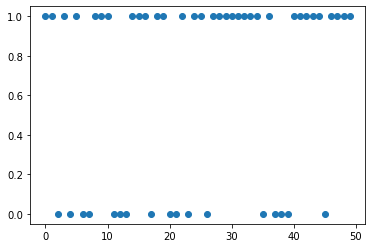

In [13]:
plot = plt.scatter(range(50), play(Strategie.CHANGER, 50))

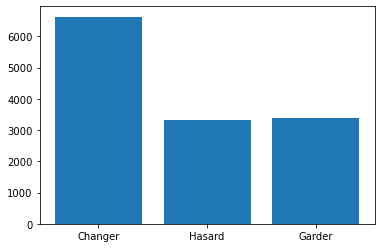

In [14]:
plot = plt.bar([1,2,3],[sum(play(Strategie.CHANGER, 10000)),
                     sum(play(Strategie.HASARD, 10000)),
                     sum(play(Strategie.GARDER, 10000))],
              tick_label=["Changer", "Hasard", "Garder"])

In [27]:
gains_changer = []
gains_garder = []
gains_hasard = []
samples = [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_garder.append(play(Strategie.GARDER, tours))
    gains_hasard.append(play(Strategie.HASARD, tours))

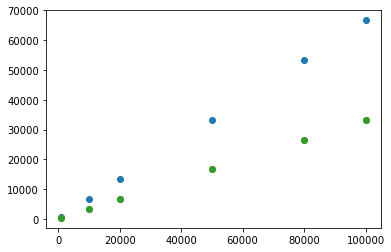

In [28]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
plot = plt.scatter(samples, [sum(x) for x in gains_hasard])

In [29]:
moyenne_changer = []
moyenne_garder = []
moyenne_hasard = []

for tours in samples:
    moyenne_changer = [sum(x) for x in gains_changer]
    moyenne_garder = [sum(x) for x in gains_garder]
    moyenne_hasard = [sum(x) for x in gains_hasard]
    
print('somme en changeant :', moyenne_changer)
print('somme en gardant :', moyenne_garder)
print('somme en hasardant :', moyenne_hasard)

for i in range (0,6):
    moyenne_changer[i] = moyenne_changer[i]/samples[i]
    moyenne_garder[i] = moyenne_garder[i]/samples[i]
    moyenne_hasard[i] = moyenne_hasard[i]/samples[i]
    
print('moyenne en changeant :', moyenne_changer)
print('moyenne en gardant :', moyenne_garder)
print('moyenne en hasardant :', moyenne_hasard)

somme en changeant : [656, 6653, 13261, 33242, 53305, 66699]
somme en gardant : [337, 3312, 6820, 16783, 26610, 33285]
somme en hasardant : [337, 3298, 6575, 16652, 26648, 33150]
moyenne en changeant : [0.656, 0.6653, 0.66305, 0.66484, 0.6663125, 0.66699]
moyenne en gardant : [0.337, 0.3312, 0.341, 0.33566, 0.332625, 0.33285]
moyenne en hasardant : [0.337, 0.3298, 0.32875, 0.33304, 0.3331, 0.3315]


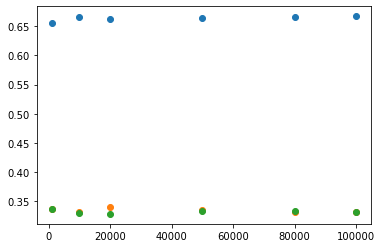

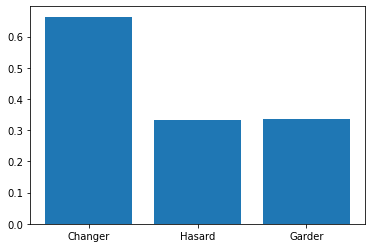

In [30]:
figure = plt.figure()
plot = plt.scatter(samples, moyenne_changer)
plot = plt.scatter(samples, moyenne_garder)
plot = plt.scatter(samples, moyenne_hasard)

figure2 = plt.figure()
plot = plt.bar([1,2,3],[sum(moyenne_changer)/6,
                     sum(moyenne_hasard)/6,
                     sum(moyenne_garder)/6],
              tick_label=["Changer", "Hasard", "Garder"])